In [2]:
import pymc3 as pm
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('./data/Book.xlsx')
import theano
theano.__version__

'1.0.4'

In [4]:
# adding a column of minutes in the data
mins = []
for r in range(len(data)):
    mins.append(data.iloc[r]['time']//60) 
    
data['minute'] = mins

<Figure size 7200x7200 with 0 Axes>

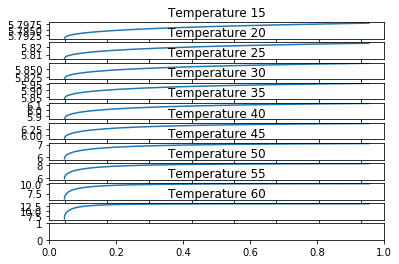

In [5]:
# plotting vref vs time plot for temperature in range 15 to 65 with a gap of 5 deg C
fig = plt.figure(figsize=(100, 100))
fig, axs = plt.subplots(11, 1)
count = 0
for T in range(15,65,5):
    time = data[data['Temperature'] == T]['minute']
    vref = data[data['Temperature'] == T]['V(vref)']
    axs[count].plot(time, vref)
    axs[count].set_title('Temperature %s' %T)
    count += 1

In [6]:
'''
Initializing model
Vref = epsilon - alpha * exp(-beta*time)
'''
def inferring_parameters(time, vref):
    model_isfet = pm.Model()
    
    with model_isfet:
        alpha = pm.Uniform('alpha',0,15)
        beta = pm.Uniform('beta',0,15)
        epsilon = pm.Uniform('epsilon', 0,20)
        sd_vref = pm.Uniform('vref_sd', 0,1)
        voltage = pm.Normal('Voltage',mu = epsilon - alpha*np.exp(-beta*time), sigma=sd_vref,observed=vref)
        step = pm.Metropolis()
        trace = pm.sample(200000, step=step)
    
    return trace

In [7]:
Traces = {}
for T in range(15,66,5):
    print("Working on Temperaure %s", %T)
    time = data[data['Temperature'] == T]['minute']
    vref = data[data['Temperature'] == T]['V(vref)']
    trace = inferring_parameters(time, vref)
    Traces[T] = trace

Working on Temperaure %s 15


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:52<00:00, 2745.50draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure %s 20


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:58<00:00, 2682.83draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure %s 25


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [07:26<00:00, 1798.10draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure %s 30


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:59<00:00, 2675.17draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure %s 35


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [06:12<00:00, 2153.58draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure %s 40


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [05:01<00:00, 2660.20draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure %s 45


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:49<00:00, 2773.58draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure %s 50


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [05:02<00:00, 2650.47draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure %s 55


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [05:00<00:00, 2668.98draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure %s 60


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:56<00:00, 2701.43draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure %s 65


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [05:01<00:00, 2661.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [8]:
import pickle as pk
pk.dump(Traces, open('Traces','wb'))

In [ ]:
print(trace["epsilon"][::3][1000:,None])
epsilon_samples = trace["epsilon"][::3][1000:,None]
alpha_samples = trace["alpha"][::3][1000:,None]  # best to make them 1d
beta_samples = trace["beta"][::3][1000:,None]

fig = plt.figure(figsize=(10, 10))
#histogram of the samples:
plt.subplot(411)
plt.title(r"Posterior distributions of the variables $\alpha$, $\beta$, and $\epsilon$")
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#A60628", normed=True)
plt.legend();

plt.subplot(412)
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#7A68A6", normed=True)
plt.legend()

plt.subplot(413)
plt.hist(epsilon_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\epsilon$", color="#A60628", normed=True)
plt.legend();

'''
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);
'''

In [ ]:
epsilon_mean = epsilon_samples.mean()
alpha_mean = alpha_samples.mean()
beta_mean = beta_samples.mean()
print(epsilon_mean, alpha_mean, beta_mean)

In [ ]:
fig = plt.figure(figsize=(7, 7))
y_pred = epsilon_mean - alpha_mean*np.exp(-beta_mean*x)
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y_pred, 'r', label='sampled data')
ax.plot(x, y, 'g')